# **Data Collection** 




# **1. Summary of features**


In [ ]:
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install scikit-learn==0.24.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 22.3 MB 1.4 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.1 which is incompatible.


In [ ]:
#Importing the needed packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#A small call to ignore all unwanted warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Set matplotlib inline and edit some screening options
%matplotlib inline
pd.set_option('max_rows', 10)
pd.plotting.register_matplotlib_converters()

In [ ]:
#Read the dataset using read_csv pandas method
dataset_path = "/content/FDataset.xlsx"
data = pd.read_excel(dataset_path)
#Represent the first 5 rows of the dataset
data.head()

,vehicle_type,registration_type,vehicle_serial_code,vehicle_make,vehicle_model,vehicle_fuel_type,vehicle_fiscal_power,vehicle_body_type,first_registration,vehicle_is_insured,...,driving_experiences,rebate_surcharge_coefficient,crm50_total_years,canceled_by_company,driver_licence_is_canceled,has_damage,damage_count,total_months_without_claims,member distributeur,assign_answer
0,1,1,M10PGTVP0167000,PEUGEOT,2008,1,4,BREAK,2015-01-23 00:00:00,1,...,NaN,90.0,NaN,0,0,1,2.0,24.0,170.0,1.0
1,1,1,M10PELVP0159667,OPEL,ASTRA,1,8,CI,2011-05-19 00:00:00,1,...,NaN,57.0,NaN,0,0,0,NaN,60.0,15.0,0.0
2,1,1,M10PELVP0159667,OPEL,ASTRA,1,8,CI,2011-05-19 00:00:00,1,...,NaN,57.0,NaN,0,0,0,NaN,60.0,46.0,1.0
3,1,1,M10PELVP0159667,OPEL,ASTRA,1,8,CI,2011-05-19 00:00:00,1,...,NaN,57.0,NaN,0,0,0,NaN,60.0,34.0,1.0
4,1,1,NaN,RENAULT,LAGUNA,1,7,CIALE,2003-07-20 00:00:00,0,...,2.0,100.0,NaN,0,0,0,NaN,0.0,232.0,2.0


## **Sub-Part 1 :** Explore the dataset
Now we need to go through some stats and understanding our dataset more : 
We will explore the types, the stats, the features names, a full summury, shape

In [ ]:
#Type per column
data.dtypes

vehicle_type                     int64
registration_type                int64
vehicle_serial_code             object
vehicle_make                    object
vehicle_model                   object
                                ...   
has_damage                       int64
damage_count                   float64
total_months_without_claims    float64
member distributeur            float64
assign_answer                  float64
Length: 35, dtype: object

In [ ]:
#Full summary for : Non-null count per column , column type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12367 entries, 0 to 12366
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   vehicle_type                   12367 non-null  int64  
 1   registration_type              12367 non-null  int64  
 2   vehicle_serial_code            2610 non-null   object 
 3   vehicle_make                   12367 non-null  object 
 4   vehicle_model                  12367 non-null  object 
 5   vehicle_fuel_type              12367 non-null  int64  
 6   vehicle_fiscal_power           12367 non-null  int64  
 7   vehicle_body_type              12367 non-null  object 
 8   first_registration             12367 non-null  object 
 9   vehicle_is_insured             12367 non-null  int64  
 10  vehicle_not_insured_reason     4907 non-null   object 
 11  purchase_mode                  12367 non-null  int64  
 12  current_value                  7070 non-null  

In [ ]:
#Dataset shape
print('Shape of Dataset:',data.shape)
print('Number of rows:',data.shape[0])
print('Number of columns : ',data.shape[1])
data

Shape of Dataset: (12367, 35)
Number of rows: 12367
Number of columns :  35


,vehicle_type,registration_type,vehicle_serial_code,vehicle_make,vehicle_model,vehicle_fuel_type,vehicle_fiscal_power,vehicle_body_type,first_registration,vehicle_is_insured,...,driving_experiences,rebate_surcharge_coefficient,crm50_total_years,canceled_by_company,driver_licence_is_canceled,has_damage,damage_count,total_months_without_claims,member distributeur,assign_answer
0,1,1,M10PGTVP0167000,PEUGEOT,2008,1,4,BREAK,2015-01-23 00:00:00,1,...,NaN,90.0,NaN,0,0,1,2.0,24.0,170.0,1.0
1,1,1,M10PELVP0159667,OPEL,ASTRA,1,8,CI,2011-05-19 00:00:00,1,...,NaN,57.0,NaN,0,0,0,NaN,60.0,15.0,0.0
2,1,1,M10PELVP0159667,OPEL,ASTRA,1,8,CI,2011-05-19 00:00:00,1,...,NaN,57.0,NaN,0,0,0,NaN,60.0,46.0,1.0
3,1,1,M10PELVP0159667,OPEL,ASTRA,1,8,CI,2011-05-19 00:00:00,1,...,NaN,57.0,NaN,0,0,0,NaN,60.0,34.0,1.0
4,1,1,NaN,RENAULT,LAGUNA,1,7,CIALE,2003-07-20 00:00:00,0,...,2.0,100.0,NaN,0,0,0,NaN,0.0,232.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12362,1,1,NaN,CITROEN,C15,1,7,AR TRAIN,2003-03-23 00:00:00,1,...,NaN,50.0,10.0,0,0,0,NaN,60.0,425.0,0.0
12363,1,1,NaN,CITROEN,C15,1,7,AR TRAIN,2003-03-23 00:00:00,1,...,NaN,50.0,10.0,0,0,0,NaN,60.0,505.0,0.0
12364,1,1,NaN,CITROEN,C15,1,7,AR TRAIN,2003-03-23 00:00:00,1,...,NaN,50.0,10.0,0,0,0,NaN,60.0,272.0,0.0
12365,1,1,NaN,CITROEN,C15,1,7,AR TRAIN,2003-03-23 00:00:00,1,...,NaN,50.0,10.0,0,0,0,NaN,60.0,204.0,2.0


In [ ]:
#Unique values for every feature
data.nunique()

vehicle_type                     3
registration_type                5
vehicle_serial_code            149
vehicle_make                   119
vehicle_model                  436
                              ... 
has_damage                       2
damage_count                     6
total_months_without_claims     54
member distributeur            187
assign_answer                    4
Length: 35, dtype: int64

In [ ]:
#Checking for null values  //il existe plusieurs valeurs nulls
data.isna().sum()

vehicle_type                       0
registration_type                  0
vehicle_serial_code             9757
vehicle_make                       0
vehicle_model                      0
                               ...  
has_damage                         0
damage_count                   10574
total_months_without_claims     1856
member distributeur                1
assign_answer                      1
Length: 35, dtype: int64

In [ ]:
#Dataset summary statistics for all columns
data.describe() 

,vehicle_type,registration_type,vehicle_fuel_type,vehicle_fiscal_power,vehicle_is_insured,purchase_mode,current_value,registration_card_holder_type,vehicule_usage_type,kilometers_driver_per_year,...,driving_experiences,rebate_surcharge_coefficient,crm50_total_years,canceled_by_company,driver_licence_is_canceled,has_damage,damage_count,total_months_without_claims,member distributeur,assign_answer
count,12367.000000,12367.000000,12367.00000,12367.000000,12367.000000,12367.000000,7070.000000,12367.000000,12367.000000,12367.000000,...,1433.000000,12344.000000,4255.000000,12367.000000,12367.000000,12367.000000,1793.000000,10511.000000,12366.000000,12366.000000
mean,1.071481,1.078596,1.13722,10.074068,0.610981,1.246786,26792.145827,1.533355,1.852672,7.526805,...,4.977669,73.704877,6.551586,0.064931,0.006307,0.139727,1.431121,33.403292,363.103024,0.327187
std,0.365371,0.402122,0.60606,10.156539,0.487547,0.628892,37350.066752,1.370361,0.723084,2.617896,...,1.845893,22.388033,7.127861,0.246414,0.079170,0.346717,0.856222,24.309825,243.512332,0.717310
min,1.000000,1.000000,1.00000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-82.000000,1.000000,0.000000
25%,1.000000,1.000000,1.00000,5.000000,0.000000,1.000000,6000.000000,1.000000,1.000000,7.000000,...,6.000000,50.000000,3.000000,0.000000,0.000000,0.000000,1.000000,11.000000,238.000000,0.000000
50%,1.000000,1.000000,1.00000,7.000000,1.000000,1.000000,15000.000000,1.000000,2.000000,9.000000,...,6.000000,75.000000,5.000000,0.000000,0.000000,0.000000,1.000000,36.000000,316.000000,0.000000
75%,1.000000,1.000000,1.00000,10.000000,1.000000,1.000000,32000.000000,1.000000,2.000000,9.000000,...,6.000000,95.000000,9.000000,0.000000,0.000000,0.000000,2.000000,60.000000,436.000000,0.000000
max,3.000000,5.000000,6.00000,92.000000,1.000000,5.000000,480000.000000,8.000000,4.000000,9.000000,...,6.000000,195.000000,50.000000,1.000000,1.000000,1.000000,6.000000,160.000000,1103.000000,4.000000


## **Sub-Part 2 :** Explore the main target 
In this step we are going to have the summury for the main column "assign_answer", as our goal is to classify the requests answer 

In [ ]:
#Column Summury 
data.assign_answer.describe()

count    12366.000000
mean         0.327187
std          0.717310
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: assign_answer, dtype: float64

In [ ]:
#Check for null values
data.assign_answer.isna().sum()

1

In [ ]:
#Unique values (classes) // existe des valeurs nulls ici
print(data.assign_answer.unique())

[ 1.  0.  2.  4. nan]


0.0    10059
2.0     1658
1.0      622
4.0       27
Name: assign_answer, dtype: int64


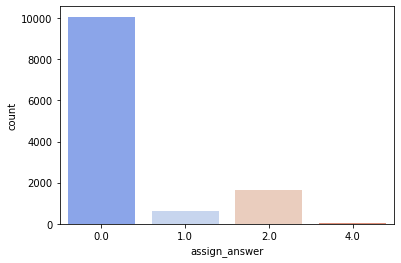

In [ ]:
#Value per class
print(data.assign_answer.value_counts())
#Visualise the results
train_labels=data.assign_answer.to_frame()
sns.countplot(x='assign_answer', palette="coolwarm", data=train_labels)
plt.show()

## **Sub-Part 3** : Explore the dataset features
In this part, we are going to explore the dataset features and do a summury for all of them also check types, missing values, etc.

In [ ]:
#Get the list of numerical columns and categorical columns to explore them 
numeric_data = list((data.select_dtypes(include=[np.number])).columns)  #make the number columns
categorical_data = list((data.select_dtypes(exclude=[np.number])).columns)   #make the categorical columns

In [ ]:
#Extra step for numerical columns, we need to remove the columns that contain IDs because they will no help us doing the analysis
to_remove = [] #a list to store the column names to remove 
for i in numeric_data :
    if '_id' in i :
        to_remove.append(i)
for i in to_remove:
    numeric_data.remove(i)

### A. Categorical data

In [ ]:
#Explore the categorical features
"""
In this part we are going to create a full_summury to the categorical columns where we will get the number 
of missing values for each column and how many category per column and the most existing category per column
"""
categorical_sum = data[categorical_data].describe()
for column in categorical_data:
    categorical_sum.loc['missing',column] = data[column].isnull().sum()
    #categorical_sum.loc['values',column] = data[column].unique()
categorical_sum

,vehicle_serial_code,vehicle_make,vehicle_model,vehicle_body_type,first_registration,vehicle_not_insured_reason,driver_licence_info
count,2610,12367,12367.0,12367,12367,4907.0,731
unique,149,119,436.0,20,595,225.0,44
top,xxx,RENAULT,308.0,BREAK,2011-02-01 00:00:00,0.0,B
freq,54,1146,315.0,3578,105,268.0,94
missing,9757,0,0.0,0,0,7460.0,11636


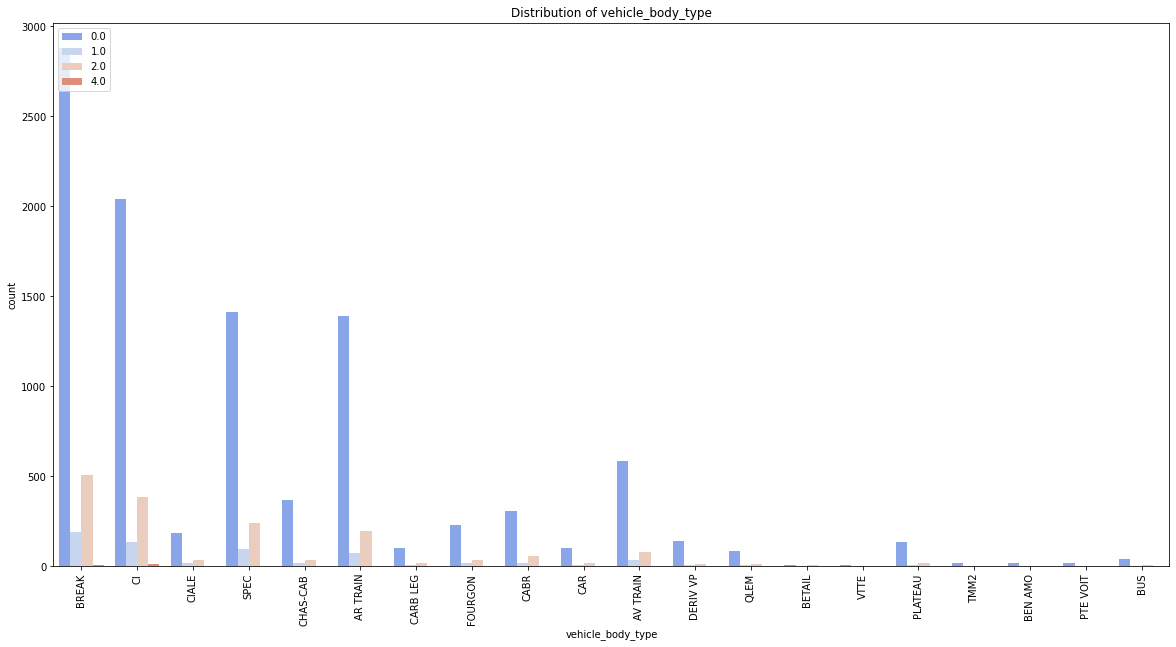

In [ ]:
# Visualise some of categorical features compared to assign_answer
for column in ["vehicle_body_type"]:
    plt.figure(figsize=(20,10))
    plt.xticks(rotation=90) 
    sns.countplot(x=column, hue='assign_answer', palette="coolwarm", data=data)
    plt.legend()
    plt.title("Distribution of " +column)
    #plt.savefig(column+'.jpg')

### B. Numerical data

In [ ]:
#Explore the numerical features
numerical_sum = data[numeric_data].describe()
for column in numeric_data:
    numerical_sum.loc['missing',column] = data[column].isnull().sum()
numerical_sum

,vehicle_type,registration_type,vehicle_fuel_type,vehicle_fiscal_power,vehicle_is_insured,purchase_mode,current_value,registration_card_holder_type,vehicule_usage_type,kilometers_driver_per_year,...,driving_experiences,rebate_surcharge_coefficient,crm50_total_years,canceled_by_company,driver_licence_is_canceled,has_damage,damage_count,total_months_without_claims,member distributeur,assign_answer
count,12367.000000,12367.000000,12367.00000,12367.000000,12367.000000,12367.000000,7070.000000,12367.000000,12367.000000,12367.000000,...,1433.000000,12344.000000,4255.000000,12367.000000,12367.000000,12367.000000,1793.000000,10511.000000,12366.000000,12366.000000
mean,1.071481,1.078596,1.13722,10.074068,0.610981,1.246786,26792.145827,1.533355,1.852672,7.526805,...,4.977669,73.704877,6.551586,0.064931,0.006307,0.139727,1.431121,33.403292,363.103024,0.327187
std,0.365371,0.402122,0.60606,10.156539,0.487547,0.628892,37350.066752,1.370361,0.723084,2.617896,...,1.845893,22.388033,7.127861,0.246414,0.079170,0.346717,0.856222,24.309825,243.512332,0.717310
min,1.000000,1.000000,1.00000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-82.000000,1.000000,0.000000
25%,1.000000,1.000000,1.00000,5.000000,0.000000,1.000000,6000.000000,1.000000,1.000000,7.000000,...,6.000000,50.000000,3.000000,0.000000,0.000000,0.000000,1.000000,11.000000,238.000000,0.000000
50%,1.000000,1.000000,1.00000,7.000000,1.000000,1.000000,15000.000000,1.000000,2.000000,9.000000,...,6.000000,75.000000,5.000000,0.000000,0.000000,0.000000,1.000000,36.000000,316.000000,0.000000
75%,1.000000,1.000000,1.00000,10.000000,1.000000,1.000000,32000.000000,1.000000,2.000000,9.000000,...,6.000000,95.000000,9.000000,0.000000,0.000000,0.000000,2.000000,60.000000,436.000000,0.000000
max,3.000000,5.000000,6.00000,92.000000,1.000000,5.000000,480000.000000,8.000000,4.000000,9.000000,...,6.000000,195.000000,50.000000,1.000000,1.000000,1.000000,6.000000,160.000000,1103.000000,4.000000
missing,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,5297.000000,0.000000,0.000000,0.000000,...,10934.000000,23.000000,8112.000000,0.000000,0.000000,0.000000,10574.000000,1856.000000,1.000000,1.000000


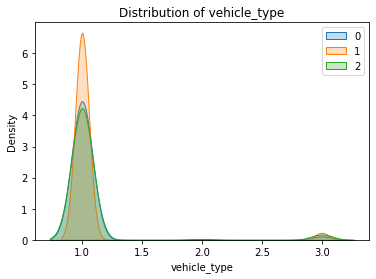

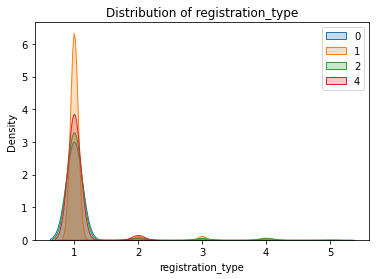

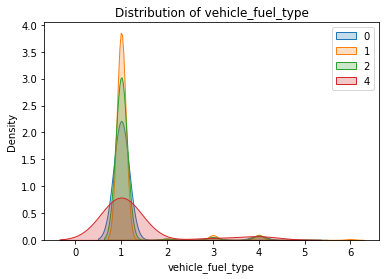

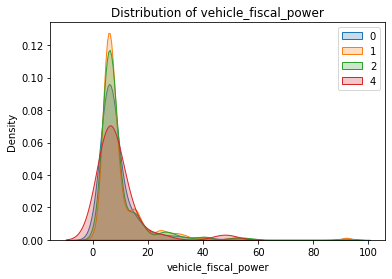

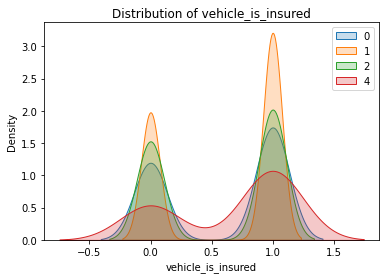

In [ ]:
#In this part, we are going to visualise some of the numerical features 

#Split the data into 4 classes 
data_0 = data.loc[(data.assign_answer==0)]
data_1 = data.loc[(data.assign_answer==1)]
data_2 = data.loc[(data.assign_answer==2)]
data_4 = data.loc[(data.assign_answer==4)]

for column in numeric_data[:5]:
    if column != "assign_answer":
        plt.figure()
        sns.kdeplot(data=data_1[column], label="0", shade=True)
        sns.kdeplot(data=data_0[column], label="1", shade=True)
        sns.kdeplot(data=data_2[column], label="2", shade=True)
        sns.kdeplot(data=data_4[column], label="4", shade=True)
        plt.legend()
        plt.title("Distribution of " +column)

In [ ]:
numeric_data

['vehicle_type',
 'registration_type',
 'vehicle_fuel_type',
 'vehicle_fiscal_power',
 'vehicle_is_insured',
 'purchase_mode',
 'current_value',
 'registration_card_holder_type',
 'vehicule_usage_type',
 'kilometers_driver_per_year',
 'parking_mode',
 'trailer_caravan_type',
 'usual_driver_type',
 'driver_status',
 'driver_professional_category',
 'driver_is_exclusive',
 'has_second_driver',
 'insured_total_months',
 'driving_experiences',
 'rebate_surcharge_coefficient',
 'crm50_total_years',
 'canceled_by_company',
 'driver_licence_is_canceled',
 'has_damage',
 'damage_count',
 'total_months_without_claims',
 'member distributeur',
 'assign_answer']

## Sub-Part 4 : Checking for missing values

In [ ]:
# number & % of values missing in each column
values_list = list()
counts_list = list()
cols_list = list()

for col in (numeric_data+categorical_data):
    pct_missing = (data[col].isnull().sum()/len(data))*100 #calculate the percentage of missing data
    cot_missing = data[col].isnull().sum() #calculate the number of missing data
    cols_list.append(col)
    counts_list.append(cot_missing)
    values_list.append(pct_missing)
    
pct_missing_df = pd.DataFrame()
pct_missing_df['col'] = cols_list
pct_missing_df['pct_missing'] = values_list
pct_missing_df['count_missing'] = counts_list

#We will have dataframe that contains the name, the percenatge per column and the count of missing values
pct_missing_df

,col,pct_missing,count_missing
0,vehicle_type,0.000000,0
1,registration_type,0.000000,0
2,vehicle_fuel_type,0.000000,0
3,vehicle_fiscal_power,0.000000,0
4,vehicle_is_insured,0.000000,0
...,...,...,...
30,vehicle_model,0.000000,0
31,vehicle_body_type,0.000000,0
32,first_registration,0.000000,0
33,vehicle_not_insured_reason,60.321824,7460


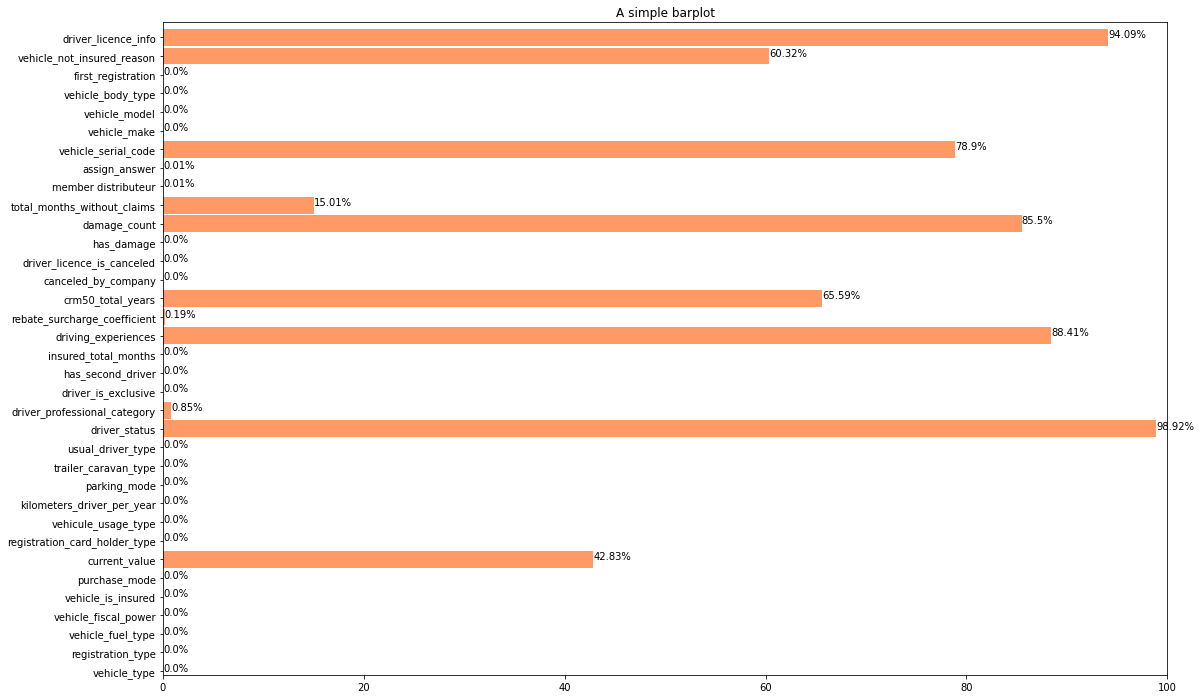

In [ ]:
# In this part, we are going to plot the percentage per column
plt.figure(figsize=(18,12))
plt.barh(pct_missing_df['col'], pct_missing_df['pct_missing'], color ='#ff9966',height = 0.9)
for x, y, p in zip(pct_missing_df['pct_missing'], pct_missing_df['col'], pct_missing_df['pct_missing']):
    plt.text(x, y, str(round(p,2))+"%")
plt.title('A simple barplot')
plt.ylim(-0.2,len(pct_missing_df)-.2)
plt.xlim(0,100)
plt.show()

In [ ]:
# Getting columns with more than 60% null values
pct_missing_cols_list = list(pct_missing_df.loc[pct_missing_df.pct_missing > 60, 'col'].values)
pct_missing_cols_list

['driver_status',
 'driving_experiences',
 'crm50_total_years',
 'damage_count',
 'vehicle_serial_code',
 'vehicle_not_insured_reason',
 'driver_licence_info']

#**2: Data Pre-processing**
In this part, after exploring our dataset we are going to apply some cleaning steps on the dataset and apply some preprocessing technique to make sure that our data is ready to train the models.

## Sub-Part 1 : Missing value handling
 1. The first one will be removing any feature that has more than 60% missing values  
 2. The second step will be imputing all the missing values on the columns (features) that have less than 60% missing values.
 3. Just to mention we will apply these steps only with the numerical columns, as we already have small categorical features and we can't perform the second step on (imputing), so we will deal with them separately

In [ ]:
# Dropping the columns that have more than 60% of missing values 
print("Number of columns before dropping:",len(data.columns))
try :
    data.drop(columns= pct_missing_cols_list, inplace=True)
    print("Number of columns after dropping:",len(data.columns))
except :
    pass


Number of columns before dropping: 35
Number of columns after dropping: 28


In [ ]:
data.columns

Index(['vehicle_type', 'registration_type', 'vehicle_make', 'vehicle_model',
       'vehicle_fuel_type', 'vehicle_fiscal_power', 'vehicle_body_type',
       'first_registration', 'vehicle_is_insured', 'purchase_mode',
       'current_value', 'registration_card_holder_type', 'vehicule_usage_type',
       'kilometers_driver_per_year', 'parking_mode', 'trailer_caravan_type',
       'usual_driver_type', 'driver_professional_category',
       'driver_is_exclusive', 'has_second_driver', 'insured_total_months',
       'rebate_surcharge_coefficient', 'canceled_by_company',
       'driver_licence_is_canceled', 'has_damage',
       'total_months_without_claims', 'member distributeur', 'assign_answer'],
      dtype='object')

In [ ]:
# Dropping duplicates by considering all columns other than ID
cols_other_than_id = list(data.columns)[1:]
data.drop_duplicates(subset=cols_other_than_id, inplace=True)

In [ ]:
# Dropping columns that represents IDs
for i in data:
    if i not in numeric_data+categorical_data : #We already cleaned these 2 lists of columns from the columns that represent an IDs
        data = data.drop([i], axis = 1)

In [ ]:
#After updating the dataset we need to re-define the numeric and the non-numeric columns again
numeric_data = list((data.select_dtypes(include=[np.number])).columns)
categorical_data = list((data.select_dtypes(exclude=[np.number])).columns)
to_remove = [] 
for i in numeric_data :
    if '_id' in i :
        to_remove.append(i)
for i in to_remove:
    numeric_data.remove(i)

In [ ]:
#Imputing the numerical columns that have less than 60% missing values ((median))
for col in numeric_data:
    missing = data[col].isnull()
    num_missing = np.sum(missing)
    if num_missing > 0:  # impute values only for columns that have missing values
        med = data[col].median() #impute with the median
        data[col] = data[col].fillna(med)

In [ ]:
#Imputing the categorical columns that have less than 60% missing values ((top))
for col in categorical_data:
    missing = data[col].isnull()
    num_missing = np.sum(missing)
    if num_missing > 0:  # impute values only for columns that have missing values
        mod = data[col].describe()['top'] # impute with the most frequently occuring value
        data[col] = data[col].fillna(mod)

In [ ]:
#Check if there's more any null value still exists in the dataset
print("Number of null values :",data.isnull().sum().sum())
data.isna().sum()

Number of null values : 0


vehicle_type                   0
registration_type              0
vehicle_make                   0
vehicle_model                  0
vehicle_fuel_type              0
                              ..
driver_licence_is_canceled     0
has_damage                     0
total_months_without_claims    0
member distributeur            0
assign_answer                  0
Length: 28, dtype: int64

## Sub-Part 2 : Encoding data
For the columns with categorical type we are going to factorize these values into a numercial ones

In [ ]:
data.drop("first_registration",axis=1,inplace=True)

In [ ]:
data

,vehicle_type,registration_type,vehicle_make,vehicle_model,vehicle_fuel_type,vehicle_fiscal_power,vehicle_body_type,vehicle_is_insured,purchase_mode,current_value,...,driver_is_exclusive,has_second_driver,insured_total_months,rebate_surcharge_coefficient,canceled_by_company,driver_licence_is_canceled,has_damage,total_months_without_claims,member distributeur,assign_answer
0,1,1,PEUGEOT,2008,1,4,BREAK,1,1,12000.0,...,1,0,24,90.0,0,0,1,24.0,170.0,1.0
1,1,1,OPEL,ASTRA,1,8,CI,1,1,15000.0,...,0,0,36,57.0,0,0,0,60.0,15.0,0.0
2,1,1,OPEL,ASTRA,1,8,CI,1,1,15000.0,...,0,0,36,57.0,0,0,0,60.0,46.0,1.0
3,1,1,OPEL,ASTRA,1,8,CI,1,1,15000.0,...,0,0,36,57.0,0,0,0,60.0,34.0,1.0
4,1,1,RENAULT,LAGUNA,1,7,CIALE,0,1,2000.0,...,0,0,0,100.0,0,0,0,0.0,232.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12362,1,1,CITROEN,C15,1,7,AR TRAIN,1,1,2500.0,...,0,1,36,50.0,0,0,0,60.0,425.0,0.0
12363,1,1,CITROEN,C15,1,7,AR TRAIN,1,1,2500.0,...,0,1,36,50.0,0,0,0,60.0,505.0,0.0
12364,1,1,CITROEN,C15,1,7,AR TRAIN,1,1,2500.0,...,0,1,36,50.0,0,0,0,60.0,272.0,0.0
12365,1,1,CITROEN,C15,1,7,AR TRAIN,1,1,2500.0,...,0,1,36,50.0,0,0,0,60.0,204.0,2.0


In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

#function
#pp is a list in which i make the important categorical columns 
PP = ['vehicle_model','vehicle_make','vehicle_body_type']
for f in PP:
  if data[f].dtype == 'object':
    lbl = preprocessing.LabelEncoder()# one hot encode outputs
    # watch how to handle missing value labeling
    lbl.fit(list(data[f].values))
    data[f] = lbl.transform(list(data[f].values))
data.info

<bound method DataFrame.info of        vehicle_type  registration_type  vehicle_make  vehicle_model  \
0                 1                  1            60              9   
1                 1                  1            58             76   
2                 1                  1            58             76   
3                 1                  1            58             76   
4                 1                  1            65            210   
...             ...                ...           ...            ...   
12362             1                  1            13             95   
12363             1                  1            13             95   
12364             1                  1            13             95   
12365             1                  1            13             95   
12366             1                  1            13             95   

       vehicle_fuel_type  vehicle_fiscal_power  vehicle_body_type  \
0                      1                     4

In [ ]:
data

,vehicle_type,registration_type,vehicle_make,vehicle_model,vehicle_fuel_type,vehicle_fiscal_power,vehicle_body_type,vehicle_is_insured,purchase_mode,current_value,...,driver_is_exclusive,has_second_driver,insured_total_months,rebate_surcharge_coefficient,canceled_by_company,driver_licence_is_canceled,has_damage,total_months_without_claims,member distributeur,assign_answer
0,1,1,60,9,1,4,4,1,1,12000.0,...,1,0,24,90.0,0,0,1,24.0,170.0,1.0
1,1,1,58,76,1,8,10,1,1,15000.0,...,0,0,36,57.0,0,0,0,60.0,15.0,0.0
2,1,1,58,76,1,8,10,1,1,15000.0,...,0,0,36,57.0,0,0,0,60.0,46.0,1.0
3,1,1,58,76,1,8,10,1,1,15000.0,...,0,0,36,57.0,0,0,0,60.0,34.0,1.0
4,1,1,65,210,1,7,11,0,1,2000.0,...,0,0,0,100.0,0,0,0,0.0,232.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12362,1,1,13,95,1,7,0,1,1,2500.0,...,0,1,36,50.0,0,0,0,60.0,425.0,0.0
12363,1,1,13,95,1,7,0,1,1,2500.0,...,0,1,36,50.0,0,0,0,60.0,505.0,0.0
12364,1,1,13,95,1,7,0,1,1,2500.0,...,0,1,36,50.0,0,0,0,60.0,272.0,0.0
12365,1,1,13,95,1,7,0,1,1,2500.0,...,0,1,36,50.0,0,0,0,60.0,204.0,2.0


## Sub-Part 3 : Outlier Detection
In this part, we are going to detect and remove some Outlier in the dataset if needed, the steps we will go through a lot of them are inspired from the lecture and Lab practices.

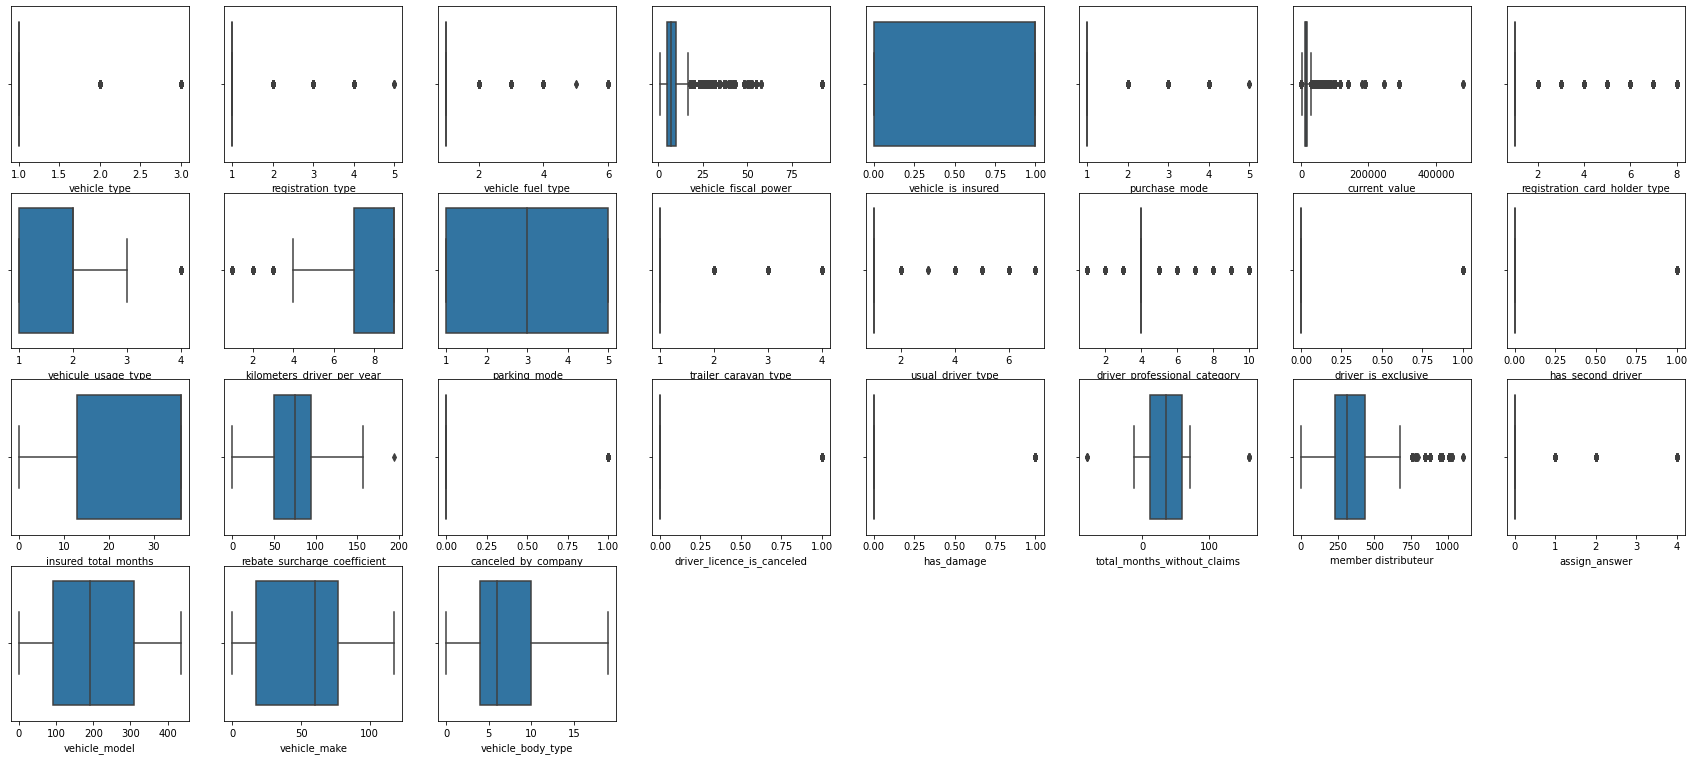

In [ ]:
plt.figure(figsize = (30,20))
features = numeric_data+PP #categorical_data
for i, feature in enumerate(features):
    plt.subplot(6,8,i+1)
    sns.boxplot(x = data[feature])


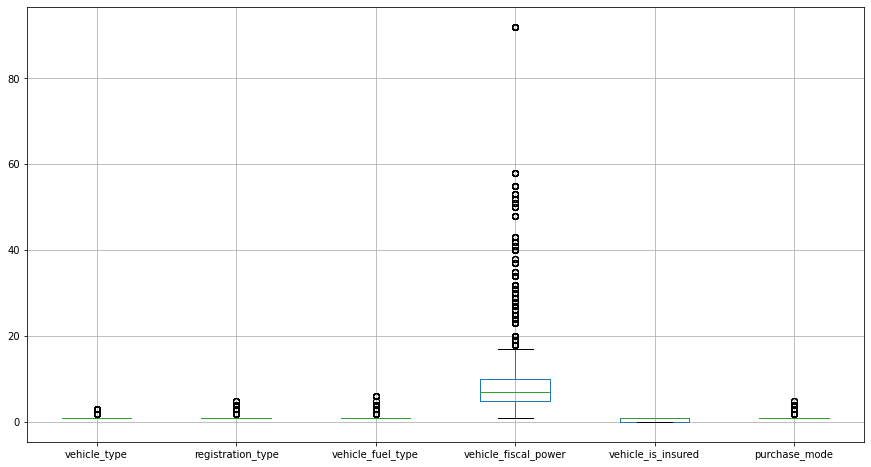

In [ ]:
#For a clear box plots we splitted the data to 5 sets of 8 features (set from 0 to 7)
plt.figure(figsize=(15,8))
data.boxplot(features[:6])

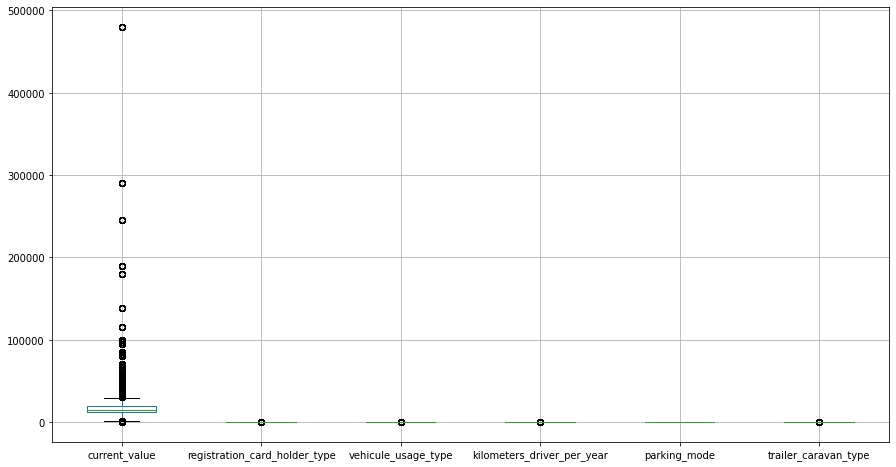

In [ ]:
#(set from 7 to 12)
plt.figure(figsize=(15,8))
data.boxplot(features[6:12])

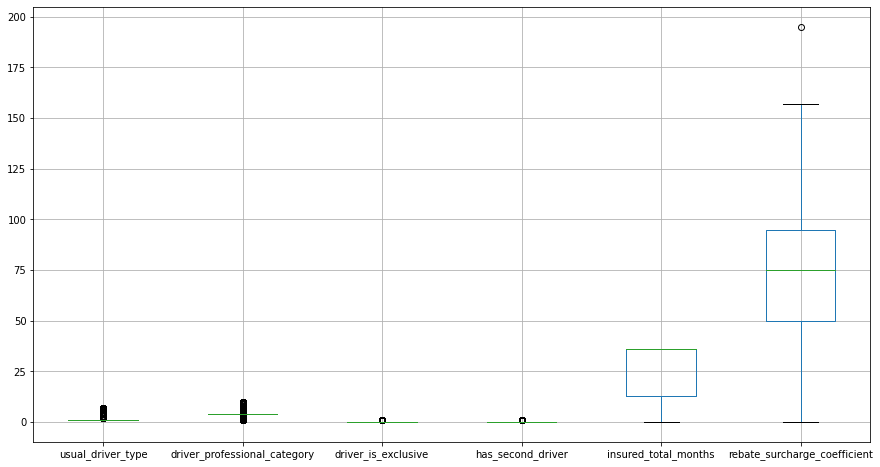

In [ ]:
#(set from 13 to 18)
plt.figure(figsize=(15,8))
data.boxplot(features[12:18])

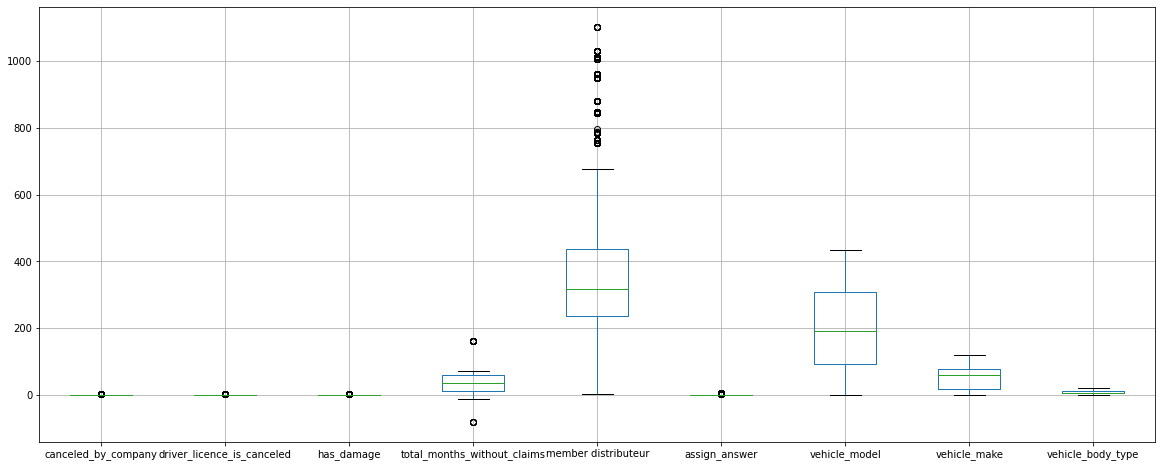

In [ ]:
#(set from 19 to 27)
plt.figure(figsize=(20,8))
data.boxplot(features[18:32])

In [ ]:
from sklearn.cluster import DBSCAN
X = data.drop(['assign_answer'], axis = 1)
#Use the algorithm for outlier detection, the return in clusters will show the membership of each point
#Any point labelled as -1 is an outlier

outlier_detection = DBSCAN(min_samples = 4, eps = 3)
clusters = outlier_detection.fit_predict(X)

#Count total number of outliers as count of those labelled as -1
TotalOutliers=list(clusters).count(-1)
print (clusters)
print("Total number of outliers identified is: ",TotalOutliers)

[-1 -1 -1 ... -1 -1 -1]
Total number of outliers identified is:  11969


In [ ]:
ground_truth = clusters
print ("Ground truth: \n", ground_truth)

Ground truth: 
 [-1 -1 -1 ... -1 -1 -1]


In [ ]:
from sklearn.ensemble import IsolationForest

#Use the algorithm for outlier detection, then use it to predict each point
#Any point labelled as -1 is an outlier
clf = IsolationForest(max_samples=150, random_state = 1, contamination= 'auto')
preds = clf.fit_predict(X)
print(preds)
totalOutliers=0
for pred in preds:
    if pred == -1:
        totalOutliers=totalOutliers+1
print("Total number of outliers identified is: ",totalOutliers)

#Calculate number of erroneos predictions where outlier predicction does not coindice with groundtruth
newarray= ((preds == -1) & (ground_truth==0))

n_errors= len([i for i in newarray if i==True])
print("Number of incorrectly identified outliers: ",n_errors)

[1 1 1 ... 1 1 1]
Total number of outliers identified is:  1581
Number of incorrectly identified outliers:  0


**Handling the outlier and deleting them seems to harm the data too much that's why we prefer to keep it as it is, and commented the part where we perform the handling (this descison came after testing the next steps with this performed cleaning)**

In [ ]:

"""# Replacing outliers with Null values
for x in features:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan


# Imputing the replaced outliers
for col in features:
    missing = data[col].isnull()
    num_missing = np.sum(missing)
    if num_missing > 0:  # impute values only for columns that have missing values
        med = data[col].median() #impute with the median
        data[col] = data[col].fillna(med)

# Final results
plt.figure(figsize=(20,8))
data.boxplot(features[:10])"""

'# Replacing outliers with Null values\nfor x in features:\n    q75,q25 = np.percentile(data.loc[:,x],[75,25])\n    intr_qr = q75-q25\n \n    max = q75+(1.5*intr_qr)\n    min = q25-(1.5*intr_qr)\n \n    data.loc[data[x] < min,x] = np.nan\n    data.loc[data[x] > max,x] = np.nan\n\n\n# Imputing the replaced outliers\nfor col in features:\n    missing = data[col].isnull()\n    num_missing = np.sum(missing)\n    if num_missing > 0:  # impute values only for columns that have missing values\n        med = data[col].median() #impute with the median\n        data[col] = data[col].fillna(med)\n\n# Final results\nplt.figure(figsize=(20,8))\ndata.boxplot(features[:10])'

In [ ]:
#Save the clean version of the dataset 
#(this version will not include any of the next processing on the dataset because most of the doesn't treated as cleaning just experiments)
data.to_csv("Clean_AutoDataset.csv", index=False)

## **Sub-Part 4 :** Feature Selection
Now we are ready to go for the feature selection,

* Feature importance is an inbuilt class that comes with Tree Based Classifiers like ExtraTreesClassifier/RandomForestClassifier, we will be using Extra Tree Classifier for extracting the features sorted by imporatnce and explore from the most important feature to the least important.

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
X = data.iloc[:, :-2].values
y = data.iloc[:, -1].values

#X = data.drop(['assign_answer'], axis = 1)  #independent columns
#y = data['assign_answer']    #target column 

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use built-in class feature_importances of tree based classifiers


[0.00919391 0.01937881 0.07121846 0.07984718 0.01578383 0.0599525
 0.06356685 0.02084347 0.03285309 0.06516426 0.03441125 0.04243757
 0.04291434 0.04898656 0.00774469 0.01304961 0.05427913 0.02857834
 0.01609159 0.10438189 0.05835648 0.01765746 0.01362535 0.02216997
 0.05751341]


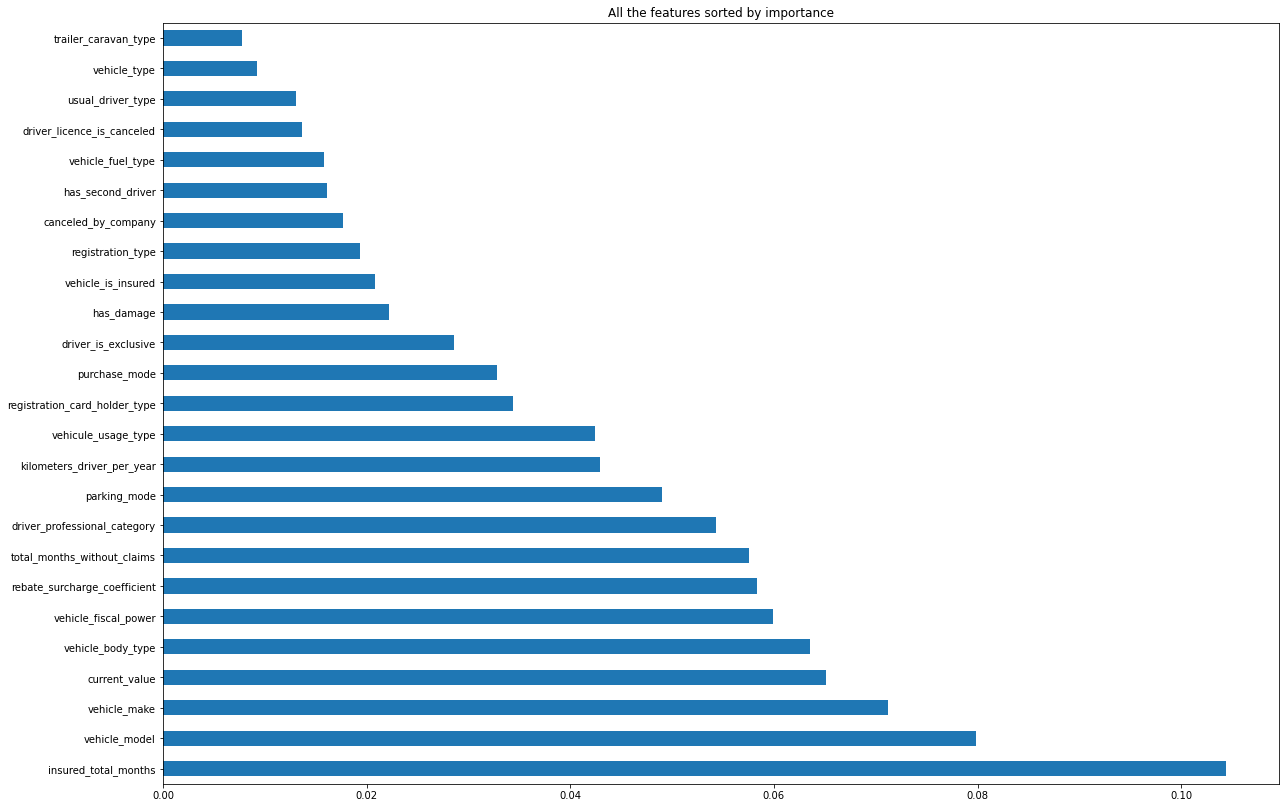

In [ ]:
#plot graph of feature importances for better visualization
plt.figure(figsize = (20,14))
feat_importances = pd.Series(model.feature_importances_, index=data.iloc[:, :-2].columns)
feat_importances.nlargest(len(data)).plot(kind='barh')
plt.title('All the features sorted by importance')
plt.show()

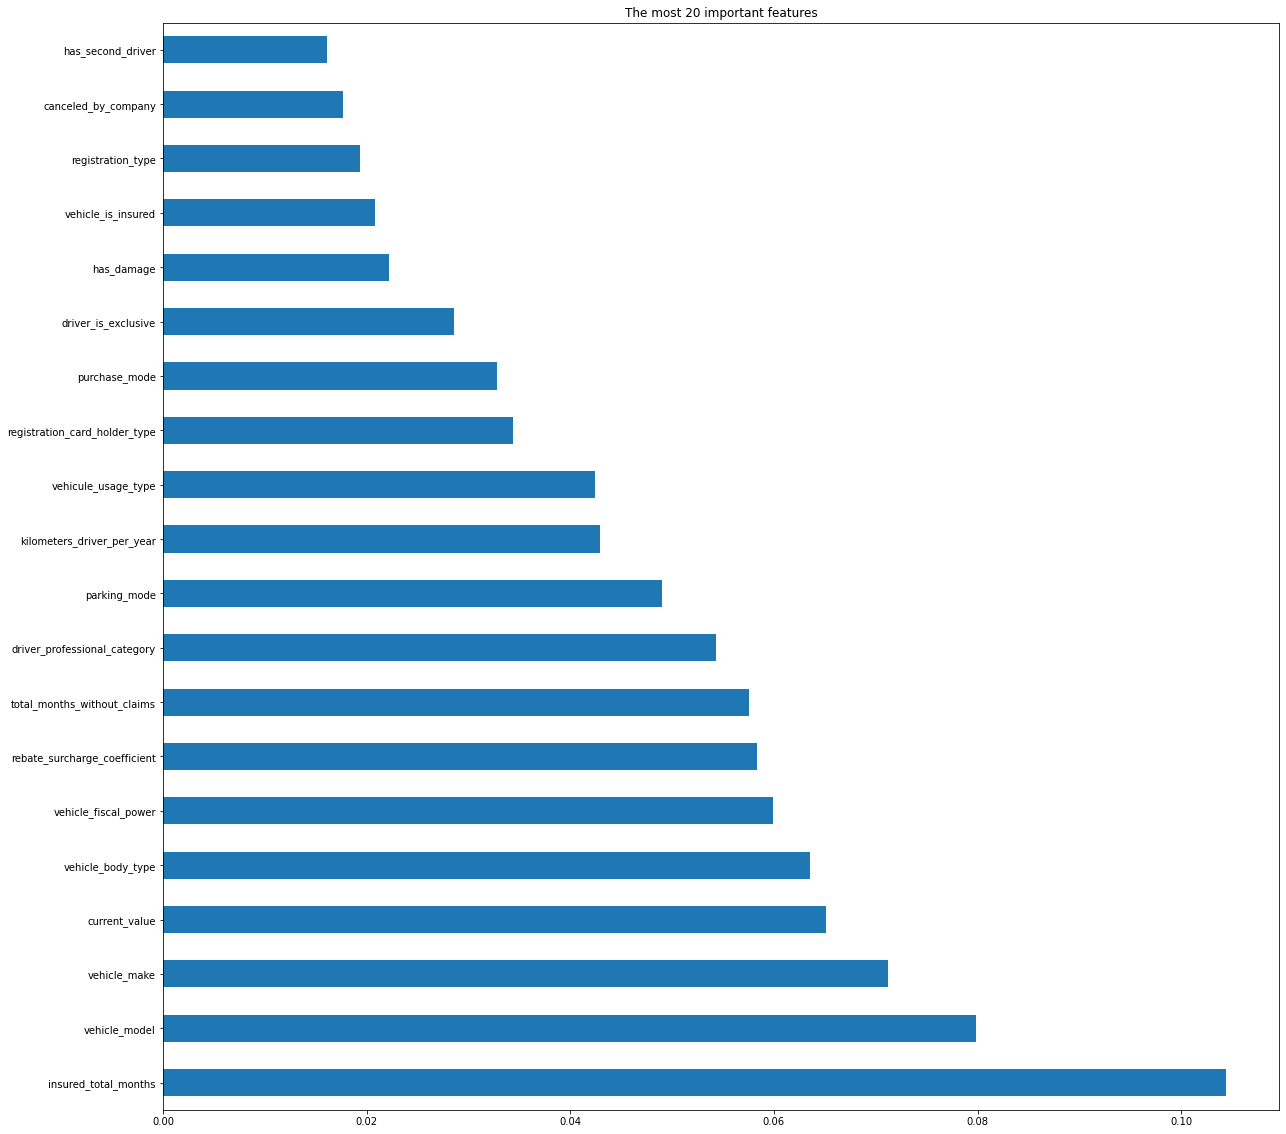

In [ ]:
#plot graph of feature importances 
plt.figure(figsize = (20,20))
feat_importances = pd.Series(model.feature_importances_, index=data.iloc[:, :-2].columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title('The most 20 important features')
plt.show()

# **3: Model Training and Evaluation**

##Sub-part 1: Discovery : 

In [ ]:
#Column selection
targets = []
for column in data:
  if column != 'member distributeur' :
    targets.append(column)
targets

['vehicle_type',
 'registration_type',
 'vehicle_make',
 'vehicle_model',
 'vehicle_fuel_type',
 'vehicle_fiscal_power',
 'vehicle_body_type',
 'vehicle_is_insured',
 'purchase_mode',
 'current_value',
 'registration_card_holder_type',
 'vehicule_usage_type',
 'kilometers_driver_per_year',
 'parking_mode',
 'trailer_caravan_type',
 'usual_driver_type',
 'driver_professional_category',
 'driver_is_exclusive',
 'has_second_driver',
 'insured_total_months',
 'rebate_surcharge_coefficient',
 'canceled_by_company',
 'driver_licence_is_canceled',
 'has_damage',
 'total_months_without_claims',
 'assign_answer']

In [ ]:
data[targets].corr()

,vehicle_type,registration_type,vehicle_make,vehicle_model,vehicle_fuel_type,vehicle_fiscal_power,vehicle_body_type,vehicle_is_insured,purchase_mode,current_value,...,driver_professional_category,driver_is_exclusive,has_second_driver,insured_total_months,rebate_surcharge_coefficient,canceled_by_company,driver_licence_is_canceled,has_damage,total_months_without_claims,assign_answer
vehicle_type,1.000000,-0.005129,-0.005875,0.063853,-0.041179,-0.030193,0.072931,0.036290,0.032345,0.220995,...,0.026878,0.074309,-0.039090,0.093501,-0.162184,-0.010345,0.059620,0.005336,0.075598,0.006785
registration_type,-0.005129,1.000000,-0.004657,-0.040253,0.004350,0.227334,-0.047692,-0.062255,0.065847,0.203695,...,0.036843,-0.028375,-0.062718,0.019860,0.028518,0.007532,-0.015680,-0.014229,-0.057146,0.030448
vehicle_make,-0.005875,-0.004657,1.000000,0.236221,0.016588,-0.115579,-0.055088,0.016400,0.004159,-0.020750,...,0.060372,-0.059916,-0.027544,-0.014178,0.013315,-0.031812,-0.045786,-0.000128,-0.004838,0.001657
vehicle_model,0.063853,-0.040253,0.236221,1.000000,0.042572,0.139611,-0.059944,-0.052370,0.064278,0.075478,...,0.023277,0.031422,-0.087651,0.064001,-0.109831,0.113379,-0.027871,0.045164,0.042296,0.001449
vehicle_fuel_type,-0.041179,0.004350,0.016588,0.042572,1.000000,0.047750,-0.000985,-0.081931,0.273235,0.145728,...,0.018906,-0.022758,-0.007796,0.054005,-0.030656,-0.019991,-0.018025,0.068956,-0.004726,0.000811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
canceled_by_company,-0.010345,0.007532,-0.031812,0.113379,-0.019991,0.013524,-0.019340,-0.098145,-0.078710,-0.018955,...,-0.023067,0.032011,-0.030804,0.007987,0.004726,1.000000,0.078143,0.037903,-0.028838,0.009538
driver_licence_is_canceled,0.059620,-0.015680,-0.045786,-0.027871,-0.018025,-0.045153,0.065556,-0.070899,0.001790,-0.024971,...,-0.000601,0.013212,-0.036652,-0.090554,-0.011742,0.078143,1.000000,0.073082,-0.047996,0.020218
has_damage,0.005336,-0.014229,-0.000128,0.045164,0.068956,0.006210,0.063083,0.076462,0.080188,-0.010751,...,0.017368,-0.008015,-0.001308,0.143198,-0.004495,0.037903,0.073082,1.000000,-0.022293,0.023709
total_months_without_claims,0.075598,-0.057146,-0.004838,0.042296,-0.004726,0.112532,-0.039648,0.263644,0.038874,0.128760,...,-0.046904,-0.037542,0.181562,0.536716,-0.534385,-0.028838,-0.047996,-0.022293,1.000000,-0.043676


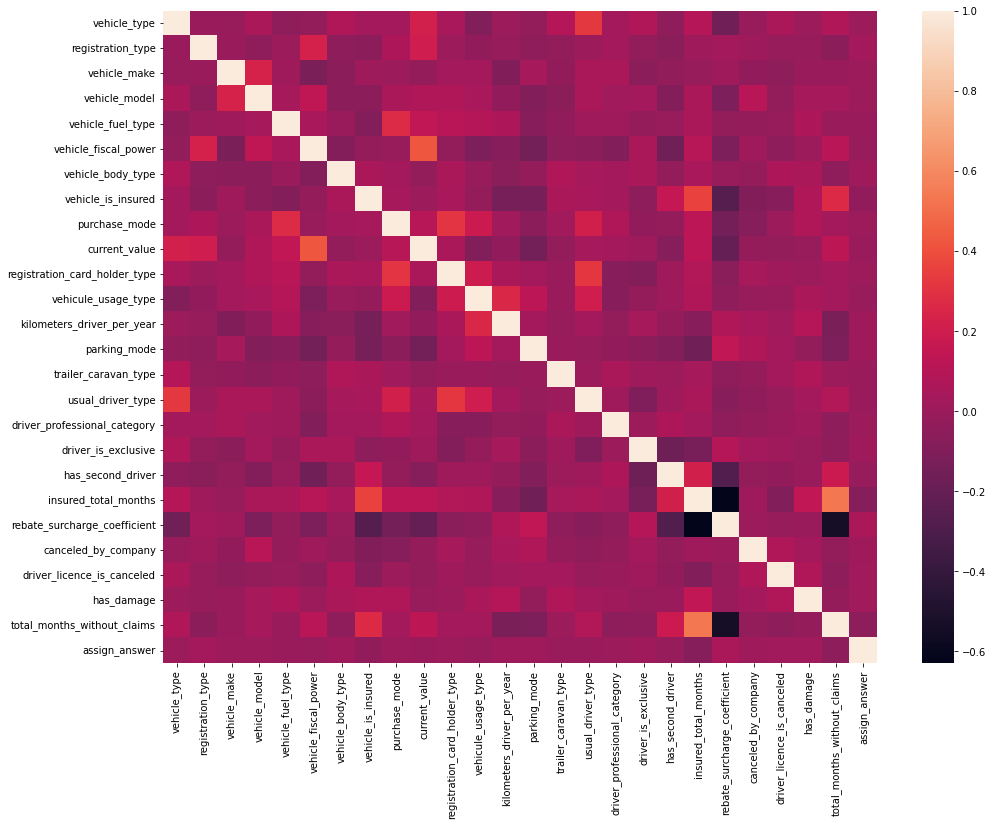

In [ ]:
plt.figure(figsize = (16, 12))
sns.heatmap(data[targets].corr())
plt.show()

## **Sub-Part 2 :** Data Sampling
In this part, we are going to check if each class have enough support to be ready for training, and look for the best method to balance our dataset

0.0    9839
2.0    1648
1.0     619
4.0      27
Name: assign_answer, dtype: int64


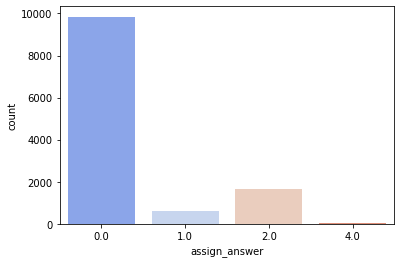

In [ ]:
#Value per class
print(data.assign_answer.value_counts())
train_labels=data.assign_answer.to_frame()
sns.countplot(x='assign_answer', palette="coolwarm", data=train_labels)
plt.show()

* So according to the previous plot, we have that class '0' has more samples than class '1' '2' '4' that's why we need to have a balance between those 2 classes to make sure that they will not cause any over/underfitting problem in the classification step

**aply the data sampling seems to harm the data too much that's why we prefer to keep it as it is, and commented the part where we perform the data sampling (this descison came after testing the next steps with this performed cleaning)**

In [ ]:
"""from sklearn.utils import resample

# Separate majority and minority classes.

df_majority = data[data.assign_answer==0]
df_minority = data[data.assign_answer==4]
df_minority2 = data[data.assign_answer==1]
df_minority3 = data[data.assign_answer==2]
print(len(df_minority),len(df_majority))
# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),     # to match majority class
                                 random_state=123) # reproducible results
df_minority_upsampled2 = resample(df_minority2,
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),     # to match majority class
                                 random_state=123) # reproducible results
df_minority_upsampled3 = resample(df_minority3,
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),     # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled, df_minority_upsampled2, df_minority_upsampled3])

 
# Display new class counts
df_upsampled.assign_answer.value_counts()"""

'from sklearn.utils import resample\n\n# Separate majority and minority classes.\n\ndf_majority = data[data.assign_answer==0]\ndf_minority = data[data.assign_answer==4]\ndf_minority2 = data[data.assign_answer==1]\ndf_minority3 = data[data.assign_answer==2]\nprint(len(df_minority),len(df_majority))\n# Upsample minority class\ndf_minority_upsampled = resample(df_minority,\n                                 replace=True,     # sample with replacement\n                                 n_samples=len(df_majority),     # to match majority class\n                                 random_state=123) # reproducible results\ndf_minority_upsampled2 = resample(df_minority2,\n                                 replace=True,     # sample with replacement\n                                 n_samples=len(df_majority),     # to match majority class\n                                 random_state=123) # reproducible results\ndf_minority_upsampled3 = resample(df_minority3,\n                                 repla

In [ ]:
"""sns.countplot(x='assign_answer', palette="coolwarm", data=df_upsampled)
plt.show()"""

'sns.countplot(x=\'assign_answer\', palette="coolwarm", data=df_upsampled)\nplt.show()'

In [ ]:
"""original = data.copy() #Save a copy from the original data (not the oversampled one) to use it later
data = df_upsampled.copy() #Assign the oversampled data to the working data"""

'original = data.copy() #Save a copy from the original data (not the oversampled one) to use it later\ndata = df_upsampled.copy() #Assign the oversampled data to the working data'

## **Sub-Part 3 :** Data spliting & Training
* The first attempt, we will use the cleaned dataset with applying any extra changes on the features or select any specific ones.
* The dataset will be splited into 80% for train and 20% for test


In [ ]:
from sklearn.model_selection import train_test_split
X = data.iloc[:, :-2].values
y = data.iloc[:, -1].values
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.2,random_state=1)
#Print shapes
print("Shapes :")
print("Xtrain shape :" , Xtrain.shape)
print("Xtest shape :" , Xtest.shape)
print("Ytrain shape :" , Ytrain.shape)
print("Ytest shape :" , Ytest.shape)

Shapes :
Xtrain shape : (9706, 25)
Xtest shape : (2427, 25)
Ytrain shape : (9706,)
Ytest shape : (2427,)


## **Sub-Part 4 :** Initial training and algorithms selection
* For this part, we will run through the most known Machine learning algorithms and select the top-most algorithm with the highest accuracy to perform the next training and experiments on these selected algorithms.
* Another point to mention is that we picked algorithms from different families to how the results vary and which family is the most suitable for our case

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import *
from sklearn.ensemble import *
from sklearn.metrics import *
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier

Logistic Regression: 81.07%
LDA: 81.09%
KNNeighbors: 76.68%
Decision Tree: 77.28%
Gaussia nNB: 79.83%
SVM: 75.17%
Random Forest: 81.08%
LGBM: 80.85%


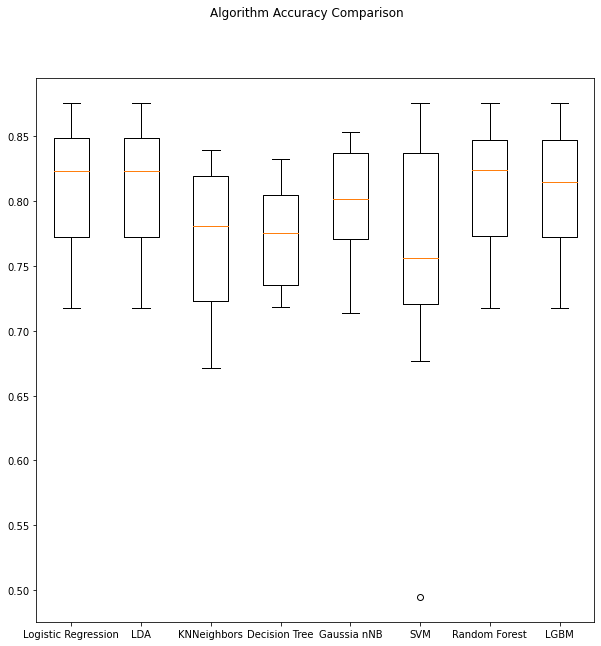

In [ ]:

models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNNeighbors', KNeighborsClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Gaussia nNB', GaussianNB()))
models.append(('SVM', LinearSVC()))
models.append(('Random Forest',RandomForestClassifier()))
models.append(('LGBM',LGBMClassifier()))


# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
        kfold = model_selection.KFold(n_splits=10)
        cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "{}: {:.2f}%".format(name, cv_results.mean()*100)
        print(msg)
# boxplot algorithm comparison
fig = plt.figure(figsize = (10,10))
fig.suptitle('Algorithm Accuracy Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

labels = names
labels_val = [round(np.max(i)*100,2) for i in results]

colors= px.colors.qualitative.Dark2
fig = (go.Figure([go.Bar(x=labels, y=labels_val,text=labels_val,textposition='auto',marker_color=colors)]))
fig.update_layout( title="Models comparison max accuracy")
fig.show()

In [ ]:
data.columns

Index(['vehicle_type', 'registration_type', 'vehicle_make', 'vehicle_model',
       'vehicle_fuel_type', 'vehicle_fiscal_power', 'vehicle_body_type',
       'vehicle_is_insured', 'purchase_mode', 'current_value',
       'registration_card_holder_type', 'vehicule_usage_type',
       'kilometers_driver_per_year', 'parking_mode', 'trailer_caravan_type',
       'usual_driver_type', 'driver_professional_category',
       'driver_is_exclusive', 'has_second_driver', 'insured_total_months',
       'rebate_surcharge_coefficient', 'canceled_by_company',
       'driver_licence_is_canceled', 'has_damage',
       'total_months_without_claims', 'member distributeur', 'assign_answer'],
      dtype='object')

In [ ]:
data

,vehicle_type,registration_type,vehicle_make,vehicle_model,vehicle_fuel_type,vehicle_fiscal_power,vehicle_body_type,vehicle_is_insured,purchase_mode,current_value,...,driver_is_exclusive,has_second_driver,insured_total_months,rebate_surcharge_coefficient,canceled_by_company,driver_licence_is_canceled,has_damage,total_months_without_claims,member distributeur,assign_answer
0,1,1,60,9,1,4,4,1,1,12000.0,...,1,0,24,90.0,0,0,1,24.0,170.0,1.0
1,1,1,58,76,1,8,10,1,1,15000.0,...,0,0,36,57.0,0,0,0,60.0,15.0,0.0
2,1,1,58,76,1,8,10,1,1,15000.0,...,0,0,36,57.0,0,0,0,60.0,46.0,1.0
3,1,1,58,76,1,8,10,1,1,15000.0,...,0,0,36,57.0,0,0,0,60.0,34.0,1.0
4,1,1,65,210,1,7,11,0,1,2000.0,...,0,0,0,100.0,0,0,0,0.0,232.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12362,1,1,13,95,1,7,0,1,1,2500.0,...,0,1,36,50.0,0,0,0,60.0,425.0,0.0
12363,1,1,13,95,1,7,0,1,1,2500.0,...,0,1,36,50.0,0,0,0,60.0,505.0,0.0
12364,1,1,13,95,1,7,0,1,1,2500.0,...,0,1,36,50.0,0,0,0,60.0,272.0,0.0
12365,1,1,13,95,1,7,0,1,1,2500.0,...,0,1,36,50.0,0,0,0,60.0,204.0,2.0


## **Sub-Part 5 :** Classification
* We will be back to the splitting part, but now let's try some classification models and we will be testing first some default classifiers with any modifications and these will be :
    1. DecisionTreeClassifier
    2. RandomForestClassifier
    3. LGBM
* What make us choosing these three classifier because they are from 3 different types, and by checking which of these types fits more our case, this way wwe can pick one type and try to get the best possible results from it.


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import *
from sklearn.ensemble import *
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier

### Classifier 1: Random Forest



In [ ]:
clf1 = RandomForestClassifier() #Model creation 
clf1.fit(Xtrain, Ytrain) #Training

RandomForestClassifier()

In [ ]:
Ypred = clf1.predict(Xtest) #Prediction using the testset (20% of our dataset)

#Score calculation
accuracy = accuracy_score(Ypred,Ytest)
bacc = balanced_accuracy_score(Ytest, Ypred)
precision = precision_score(Ytest, Ypred, pos_label='positive', average='micro')
recall = recall_score(Ytest, Ypred, pos_label='positive', average='micro')
f1 = f1_score(Ytest, Ypred, pos_label='positive', average='micro')

print("Metric scores :")
print(" Accuracy: {:.2f} %".format(accuracy*100))
print(" Balanced accuracy: {:.2f} %".format(bacc*100))
print(" Precision: {:.2f} %".format(precision*100))
print(" Recall: {:.2f} %".format(recall*100))
print(" F1: {:.2f} %".format(f1*100))


Metric scores :
 Accuracy: 81.21 %
 Balanced accuracy: 26.54 %
 Precision: 81.21 %
 Recall: 81.21 %
 F1: 81.21 %


Text(0.5, 1.0, 'The confusion matrix')

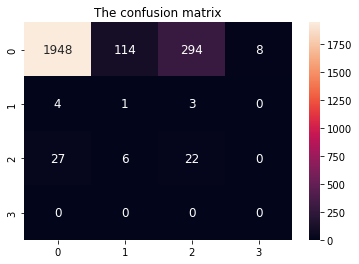

In [ ]:
#Visualise the confusion matrix
sns.heatmap(confusion_matrix(Ypred,Ytest), annot=True,annot_kws={"size": 12}, fmt='d')
plt.title("The confusion matrix")

Text(0.5, 1.0, 'Classification Report')

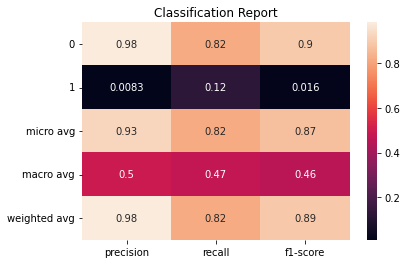

In [ ]:
#Visualize the classifiaction report into a heatmap
clf_report = classification_report(Ypred,Ytest,output_dict=True,labels=[0,1])
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
plt.title("Classification Report")

### Classifier 2: Decision Tree 

In [ ]:
clf2 = DecisionTreeClassifier()
clf2.fit(Xtrain, Ytrain)

DecisionTreeClassifier()

In [ ]:
Ypred = clf2.predict(Xtest) #Prediction using the testset (20% of our dataset)

#Score calculation
accuracy = accuracy_score(Ypred,Ytest)
bacc = balanced_accuracy_score(Ytest, Ypred)
precision = precision_score(Ytest, Ypred, pos_label='positive', average='micro')
recall = recall_score(Ytest, Ypred, pos_label='positive', average='micro')
f1 = f1_score(Ytest, Ypred, pos_label='positive', average='micro')

print("Metric scores :")
print(" Accuracy: {:.2f} %".format(accuracy*100))
print(" Balanced accuracy: {:.2f} %".format(bacc*100))
print(" Precision: {:.2f} %".format(precision*100))
print(" Recall: {:.2f} %".format(recall*100))
print(" F1: {:.2f} %".format(f1*100))


Metric scores :
 Accuracy: 81.42 %
 Balanced accuracy: 26.21 %
 Precision: 81.42 %
 Recall: 81.42 %
 F1: 81.42 %


Text(0.5, 1.0, 'The confusion matrix')

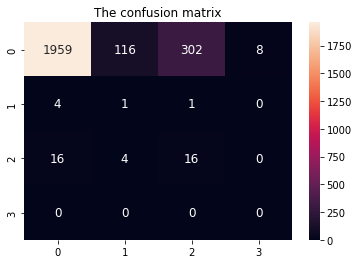

In [ ]:
#Visualise the confusion matrix
sns.heatmap(confusion_matrix(Ypred,Ytest), annot=True,annot_kws={"size": 12}, fmt='d')
plt.title("The confusion matrix")

Text(0.5, 1.0, 'Classification Report')

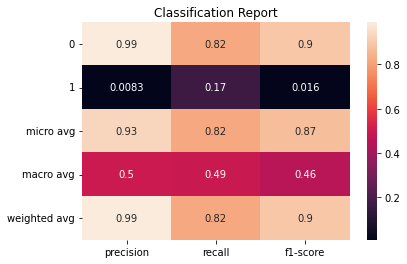

In [ ]:
#Visualize the classifiaction report into a heatmap
clf_report = classification_report(Ypred,Ytest,output_dict=True,labels=[0,1])
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
plt.title("Classification Report")

### Classifier 3: LGBM

In [ ]:
clf3 = LGBMClassifier()
clf3.fit(Xtrain, Ytrain)

LGBMClassifier()

In [ ]:
Ypred = clf3.predict(Xtest) #Prediction using the testset (20% of our dataset)

#Score calculation
accuracy = accuracy_score(Ypred,Ytest)
bacc = balanced_accuracy_score(Ytest, Ypred)
precision = precision_score(Ytest, Ypred, pos_label='positive', average='micro')
recall = recall_score(Ytest, Ypred, pos_label='positive', average='micro')
f1 = f1_score(Ytest, Ypred, pos_label='positive', average='micro')

print("Metric scores :")
print(" Accuracy: {:.2f} %".format(accuracy*100))
print(" Balanced accuracy: {:.2f} %".format(bacc*100))
print(" Precision: {:.2f} %".format(precision*100))
print(" Recall: {:.2f} %".format(recall*100))
print(" F1: {:.2f} %".format(f1*100))


Metric scores :
 Accuracy: 81.46 %
 Balanced accuracy: 26.22 %
 Precision: 81.46 %
 Recall: 81.46 %
 F1: 81.46 %


Text(0.5, 1.0, 'The confusion matrix')

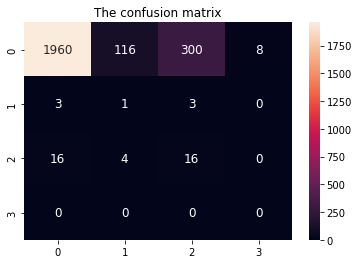

In [ ]:
#Visualise the confusion matrix
sns.heatmap(confusion_matrix(Ypred,Ytest), annot=True,annot_kws={"size": 12}, fmt='d')
plt.title("The confusion matrix")

Text(0.5, 1.0, 'Classification Report')

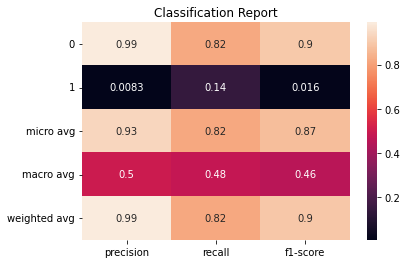

In [ ]:
#Visualize the classifiaction report into a heatmap
clf_report = classification_report(Ypred,Ytest,output_dict=True,labels=[0,1])
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
plt.title("Classification Report")

* Now after testing three sample classifier it seems that we have the best results coming out from the RandomForest Classifier, so our next step will be trying to check if it's possible to improve these results
* Grid Search with Cross Validation will be used in the first to get the best parameters that we can get from this classifier 

### Classifier 1 with Hyperparameters : Random Forest 

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random forest
"""param_grid = {
    'max_depth': [40,50,60,70,80],
    'n_estimators': [100, 200, 300, 400,500,600,1000],
}""" # To save time when testing we just left the best values we got (otherwise to run using all the parameters will take more than 30min)
param_grid = {
    'max_depth': [37],
    'n_estimators': [530],
    
}
# Create a based model
clf = LGBMClassifier() 
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
#Model creation 
grid_search.fit(Xtrain, Ytrain) #Training

grid_search.best_params_

Fitting 3 folds for each of 1 candidates, totalling 3 fits


{'max_depth': 37, 'n_estimators': 530}

In [ ]:
best = grid_search.best_params_ 
best_clf3 = LGBMClassifier(n_estimators = best['n_estimators'],max_depth = best['max_depth']) 
best_clf3.fit(Xtrain, Ytrain)

LGBMClassifier(max_depth=37, n_estimators=530)

In [ ]:
Ypred = best_clf3.predict(Xtest) #Prediction using the testset (20% of our dataset)

#Score calculation
accuracy = accuracy_score(Ypred,Ytest)
bacc = balanced_accuracy_score(Ytest, Ypred)
precision = precision_score(Ytest, Ypred, pos_label='positive', average='micro')
recall = recall_score(Ytest, Ypred, pos_label='positive', average='micro')
f1 = f1_score(Ytest, Ypred, pos_label='positive', average='micro')

print("Metric scores :")
print(" Accuracy: {:.2f} %".format(accuracy*100))
print(" Balanced accuracy: {:.2f} %".format(bacc*100))
print(" Precision: {:.2f} %".format(precision*100))
print(" Recall: {:.2f} %".format(recall*100))
print(" F1: {:.2f} %".format(f1*100))

Metric scores :
 Accuracy: 81.38 %
 Balanced accuracy: 26.39 %
 Precision: 81.38 %
 Recall: 81.38 %
 F1: 81.38 %


Text(0.5, 1.0, 'The confusion matrix')

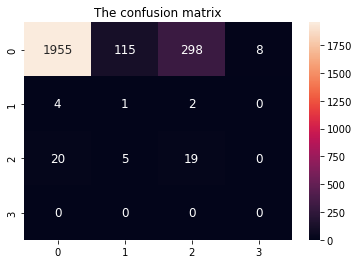

In [ ]:
#Visualise the confusion matrix
sns.heatmap(confusion_matrix(Ypred,Ytest), annot=True,annot_kws={"size": 12}, fmt='d')
plt.title("The confusion matrix")

Text(0.5, 1.0, 'Classification Report')

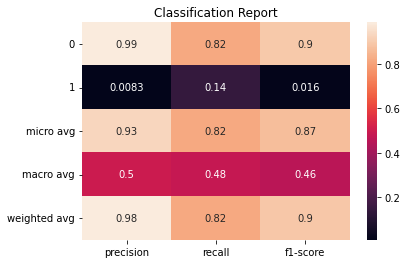

In [ ]:
#Visualize the classifiaction report into a heatmap
clf_report = classification_report(Ypred,Ytest,output_dict=True,labels=[0,1])
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
plt.title("Classification Report")

* The scores we got still not that good to consider them, the things is that we used a big set of features and we already did our analysis related to this condition and we concluded that we have multiple cases that we can work with : 
    1. The first one will be using the most important set of features (top 20) and ignore the other
    2. Otherwise, merging some features (the ones that have min & max into one features) 
    3. Another idea to merge all the features related to h1 and the other related to d1 into signle for each, and that can happen using PCA 
    4. Using the oversampled dataset
* In this position nothing can be happen without testing

### Using the most important features (top 20)

In [ ]:
# Getting the top 20 features names, you can check part 'Features selection' where we get these features sorted 
Top = list((feat_importances.nlargest(20)).index)
Top

['insured_total_months',
 'vehicle_model',
 'vehicle_make',
 'current_value',
 'vehicle_body_type',
 'vehicle_fiscal_power',
 'rebate_surcharge_coefficient',
 'total_months_without_claims',
 'driver_professional_category',
 'parking_mode',
 'kilometers_driver_per_year',
 'vehicule_usage_type',
 'registration_card_holder_type',
 'purchase_mode',
 'driver_is_exclusive',
 'has_damage',
 'vehicle_is_insured',
 'registration_type',
 'canceled_by_company',
 'has_second_driver']

In [ ]:
if 'assign_answer' not in Top:
    Top.append('assign_answer') #Adding the main feature to the list (just to make the creation of the new dataset easier)

f_data = data[Top] #Now create a new dataset that contains the features we selected

X = f_data.drop(['assign_answer'], axis = 1)
Y = f_data['assign_answer']

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.2,random_state=1)
#Print shapes
print(Xtrain.shape,Xtest.shape,Ytrain.shape,Ytest.shape)

(9706, 20) (2427, 20) (9706,) (2427,)


In [ ]:
clf = LGBMClassifier(max_depth=60, n_estimators=500, random_state=1) #Model creation 
clf.fit(Xtrain, Ytrain) #Training

LGBMClassifier(max_depth=60, n_estimators=500, random_state=1)

In [ ]:
Ypred = clf.predict(Xtest) #Prediction using the testset (20% of our dataset)

#Score calculation
accuracy = accuracy_score(Ypred,Ytest)
bacc = balanced_accuracy_score(Ytest, Ypred)
precision = precision_score(Ytest, Ypred, pos_label='positive', average='micro')
recall = recall_score(Ytest, Ypred, pos_label='positive', average='micro')
f1 = f1_score(Ytest, Ypred, pos_label='positive', average='micro')

print("Metric scores :")
print(" Accuracy: {:.2f} %".format(accuracy*100))
print(" Balanced accuracy: {:.2f} %".format(bacc*100))
print(" Precision: {:.2f} %".format(precision*100))
print(" Recall: {:.2f} %".format(recall*100))
print(" F1: {:.2f} %".format(f1*100))

Metric scores :
 Accuracy: 81.13 %
 Balanced accuracy: 26.51 %
 Precision: 81.13 %
 Recall: 81.13 %
 F1: 81.13 %


Text(0.5, 1.0, 'The confusion matrix')

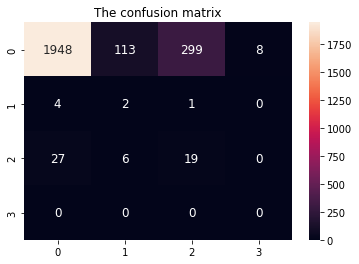

In [ ]:
#Visualise the confusion matrix
sns.heatmap(confusion_matrix(Ypred,Ytest), annot=True,annot_kws={"size": 12}, fmt='d')
plt.title("The confusion matrix")

Text(0.5, 1.0, 'Classification Report')

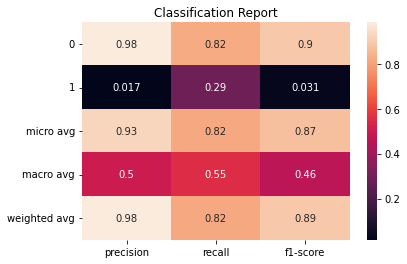

In [ ]:
#Visualize the classifiaction report into a heatmap
clf_report = classification_report(Ypred,Ytest,output_dict=True,labels=[0,1])
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
plt.title("Classification Report")

## similar request part 


In [ ]:
! pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12133 entries, 0 to 12366
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   vehicle_type                   12133 non-null  int64  
 1   registration_type              12133 non-null  int64  
 2   vehicle_make                   12133 non-null  int64  
 3   vehicle_model                  12133 non-null  int64  
 4   vehicle_fuel_type              12133 non-null  int64  
 5   vehicle_fiscal_power           12133 non-null  int64  
 6   vehicle_body_type              12133 non-null  int64  
 7   vehicle_is_insured             12133 non-null  int64  
 8   purchase_mode                  12133 non-null  int64  
 9   current_value                  12133 non-null  float64
 10  registration_card_holder_type  12133 non-null  int64  
 11  vehicule_usage_type            12133 non-null  int64  
 12  kilometers_driver_per_year     12133 non-null 

In [ ]:
for col in data: 
    if is_numeric_dtype(data[col]) :
        pass
    else :
        data[col] = data[col].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12133 entries, 0 to 12366
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   vehicle_type                   12133 non-null  int64  
 1   registration_type              12133 non-null  int64  
 2   vehicle_make                   12133 non-null  int64  
 3   vehicle_model                  12133 non-null  int64  
 4   vehicle_fuel_type              12133 non-null  int64  
 5   vehicle_fiscal_power           12133 non-null  int64  
 6   vehicle_body_type              12133 non-null  int64  
 7   vehicle_is_insured             12133 non-null  int64  
 8   purchase_mode                  12133 non-null  int64  
 9   current_value                  12133 non-null  float64
 10  registration_card_holder_type  12133 non-null  int64  
 11  vehicule_usage_type            12133 non-null  int64  
 12  kilometers_driver_per_year     12133 non-null 

In [ ]:
# Splitting the data into X and y
X = data.iloc[:, :-2].values
y = data.iloc[:, -1].values

0.0    9839
2.0    1648
1.0     619
4.0      27
Name: assign_answer, dtype: int64


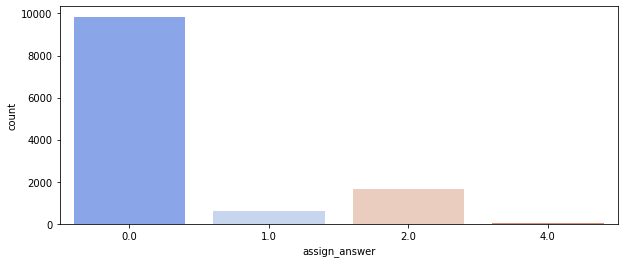

In [ ]:
# Main label distribution (level column)
print(data["assign_answer"].value_counts())

# Visualise the results
plt.figure(figsize=(10,4))
train_labels=data["assign_answer"].to_frame()
sns.countplot(x='assign_answer', palette="coolwarm", data=train_labels)
plt.show()

In [ ]:
# Separating the features and the label data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [ ]:
#from sklearn.ensemble import *
#from lightgbm import LGBMClassifier
#clf1 = LGBMClassifier()
#clf1.fit(X_train, y_train,)
#clf2 = DecisionTreeClassifier()
#clf2.fit(Xtrain, Ytrain)

In [ ]:
from sklearn.metrics import *
Ypred = clf2.predict(X_test) 

#Score calculation
accuracy = accuracy_score(Ypred,y_test)

precision = precision_score(Ypred,y_test,average='weighted')
recall = recall_score(Ypred,y_test,average='weighted')
f1 = f1_score(Ypred,y_test,average='weighted')

print("Metric scores :")
print(" Accuracy: {:.2f} %".format(accuracy*100))
print(" Precision: {:.2f} %".format(precision*100))
print(" Recall: {:.2f} %".format(recall*100))
print(" F1: {:.2f} %".format(f1*100))


Metric scores :
 Accuracy: 83.07 %
 Precision: 97.54 %
 Recall: 83.07 %
 F1: 89.09 %


In [ ]:
dataset1 = data.iloc[:, :-1].values
dataset = data.iloc[:, :-2].values
sample = dataset[1759]
pred = clf2.predict([sample])
pred

array([0.])

In [ ]:
dataset

array([[ 1.,  1., 60., ...,  0.,  1., 24.],
       [ 1.,  1., 58., ...,  0.,  0., 60.],
       [ 1.,  1., 58., ...,  0.,  0., 60.],
       ...,
       [ 1.,  1., 13., ...,  0.,  0., 60.],
       [ 1.,  1., 13., ...,  0.,  0., 60.],
       [ 1.,  1., 13., ...,  0.,  0., 60.]])

In [ ]:
from sklearn.neighbors import NearestNeighbors
from pprint import pprint
def prediction(sample, clf2):
  neigh = NearestNeighbors(n_neighbors=20)
  neigh.fit(dataset)
  neighbors = neigh.kneighbors([sample], return_distance=False)
  neighbors
  similar = []
  for i in neighbors[0] : 
    if clf2.predict([dataset[i]]) == pred :
        similar.append(dataset1[i])
  #pprint(similar)
  membre = [int(similar[i][-1]) for i in range(len(similar))]
  membre
  return membre

In [ ]:
prediction(sample,clf2)

[40,
 91,
 323,
 314,
 213,
 204,
 27,
 321,
 233,
 44,
 11,
 478,
 407,
 34,
 414,
 15,
 245,
 39,
 1,
 322]

In [ ]:
print(clf2)

DecisionTreeClassifier()


In [ ]:
import pickle
pickle.dump(clf2, open('model1.pkl','wb'))

In [ ]:
data.columns

Index(['vehicle_type', 'registration_type', 'vehicle_make', 'vehicle_model',
       'vehicle_fuel_type', 'vehicle_fiscal_power', 'vehicle_body_type',
       'vehicle_is_insured', 'purchase_mode', 'current_value',
       'registration_card_holder_type', 'vehicule_usage_type',
       'kilometers_driver_per_year', 'parking_mode', 'trailer_caravan_type',
       'usual_driver_type', 'driver_professional_category',
       'driver_is_exclusive', 'has_second_driver', 'insured_total_months',
       'rebate_surcharge_coefficient', 'canceled_by_company',
       'driver_licence_is_canceled', 'has_damage',
       'total_months_without_claims', 'member distributeur', 'assign_answer'],
      dtype='object')